# 4.1 Confidence interval

**P1** for standard normal r.v. 'z', find value 'b' such that 
$$
P(-b<z<b)=90\%
$$

1.64485362695


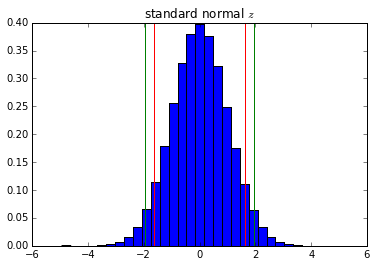

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from  scipy.stats import norm
b=norm.ppf(0.95,0,1)  #ppf is perfect to find quatile
print b
z=np.random.normal(0,1,size=1000000)
z_hist=plt.hist(z,bins=30,normed=True)
plt.title(r"standard normal $z$")
plt.axvline(x=1.96,color='g')
plt.axvline(x=-1.96,color='g')
plt.axvline(x=1.645,color='r')
plt.axvline(x=-1.645,color='r')
plt.legend()

In [59]:
norm.ppf(0.925,0,1)

1.4395314709384563

- Either population is normal 
- or population is not normal, but sample size is large ($n>30$)
- $\bar{x}\rightarrow N(\mu,\frac{\sigma^2}{n})$
- $\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$ is z-distribution

**Question:**

We draw ramdom sample of size 40 from a population with $\mu=10$ and $\sigma=5$. 
- what is distribution of $\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$?
- find $z_{\frac{\alpha}{2}}>0$, such that $P(\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}\le z_{\frac{\alpha}{2}})=0.975$
- what is the probability $P(-z_{\frac{\alpha}{2}}\le \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}\le z_{\frac{\alpha}{2}})=95\%$
- what is the probability $P(-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\le {\bar{x}-\mu}\le z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}})=95\%$
- what is the probability $P(-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\le {\mu-\bar{x}}\le z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}})=95\%$
- what is the probability $P(\bar{x}-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\le {\mu}\le \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}})=95\%$

In [56]:
z=norm.ppf(0.95,0,1)
print z

1.64485362695


**Question:** 

Population is normal with standard deviation $\sigma=5$. We randomly select a sample with sample size $n=40$. We find $\bar{x}=8$. Then we design an interval $$\left[8-1.645\frac{5}{\sqrt{40}}, 8+1.645\frac{5}{\sqrt{40}}\right]$$
What is the chance that the population mean $\mu$ is in this interval


**Discussion:**
Assume we know population mean is $\mu=5$, we randomly select 1000 samples with $n=25$. From each sample, we build an interval 
$$
\left[\bar{x}-1.645\frac{\sigma}{\sqrt{n}},\bar{x}+1.645\frac{\sigma}{\sqrt{n}}\right]
$$
We want to find out what is percentange of intervals that $\mu$ is hidden inside. 

In next cell, we plot 1000 intervals built in this way and can see that most of intervals cover $\mu=5$

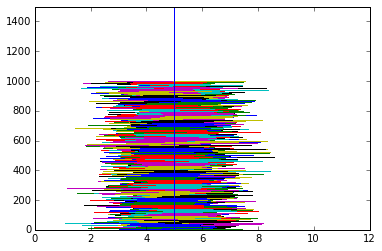

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for k in range(1000):
    sample=np.random.normal(5,5,size=40)
    left=sample.mean()-1.645*5/np.sqrt(40)
    right=sample.mean()+1.645*5/np.sqrt(40)
    plt.plot([left,right],[k,k])
    plt.axvline(x=5,color='b')
    plt.ylim(0,1500)
    plt.xlim(0,12)
    

But still, there are still some intervals which do not cover $\mu=5$.  

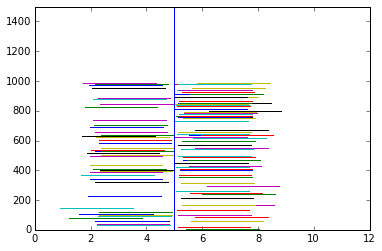

In [25]:
for k in range(1000):
    sample=np.random.normal(5,5,size=40)
    left=sample.mean()-1.645*5/np.sqrt(40)
    right=sample.mean()+1.645*5/np.sqrt(40)
    if (left>5 or right<5):
        plt.plot([left,right],[k,k])
    plt.axvline(x=5,color='b')
    plt.ylim(0,1500)
    plt.xlim(0,12)

To compute percentage of intervals that cover $\mu=5$,

In [26]:
num=0
for k in range(1000):
    sample=np.random.normal(5,5,size=40)
    left=sample.mean()-1.645*5/np.sqrt(40)
    right=sample.mean()+1.645*5/np.sqrt(40)
    if (left>5 or right<5):
       num=num+1
print num/float(1000)

0.102


**WHY:**
- $\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$ is z-distributed 
- hence  $\bar{x}-1.645\frac{\sigma}{\sqrt{n}}\le \mu\le \bar{x}+1.645\frac{\sigma}{\sqrt{n}}$ with $90\%$ chance, which is called
- Usually, we denote confidence level by $1-\alpha$, $alpha$ is significance level which is total probability of two tails. 
- Probability of each tail is $\frac{\alpha}{2}$ and the critical value is denoted as $z_{\frac{\alpha}{2}}$
**confidence level**

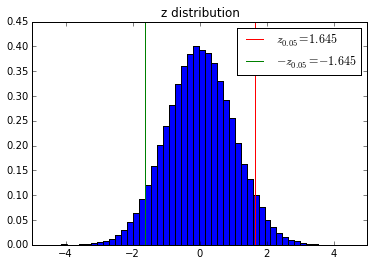

In [32]:
mean_array_hist=plt.hist(np.random.normal(0,1,100000),bins=50, normed=True)
plt.title(r"z distribution")
plt.axvline(x=1.645,color='r',label=r'$z_{0.05}=1.645$')
plt.axvline(x=-1.645,color='g',label=r'$-z_{0.05}=-1.645$')
plt.legend()

**HOW to find confidence interval for $\mu$ with certain confidence level:** 

- Find quatile $z_{\frac{\alpha}{2}}$ with probability $1-\frac{\alpha}{2}$
- $$\left[\bar{x}-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}},\bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\right]$$
- Given $n>30$, even if the population is not normal, the confidence interval is the same. 
- If the population is standard deviation is unknown, but $n>30$, the confidence interval is almost the same with $\sigma$ replaced by sample standard deviation $s$. 

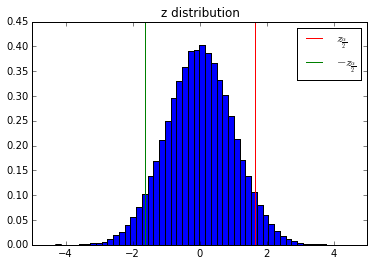

In [35]:
mean_array_hist=plt.hist(np.random.normal(0,1,100000),bins=50, normed=True)
plt.title(r"z distribution")
plt.axvline(x=1.645,color='r',label=r'$z_{\frac{\alpha}{2}}$')
plt.axvline(x=-1.645,color='g',label=r'$-z_{\frac{\alpha}{2}}$')
plt.legend()

**Example:** We have a sample from HK population with sample size$=40$.  the monthly salaries of sampled invididuals are: [10, 11,12,23,8,5,8,9,11,10,15, 11,6,17,12,10,8,9,11,9,2, 6,11,19,8,5,8,9,12,15,7, 12,15,16,8,5,8,10,12,13]   in thousand HK dollar. Please find 95% confidence interval for average salary in HK. 

In [71]:
sample=[10, 11,12,23,8,5,8,9,11,10,15, 11,6,17,12,10,8,9,11,9,2, 6,11,19,8,5,8,9,12,15,7, 12,15,16,8,5,8,10,12,13] 
sample=np.array(sample)
mean=sample.mean()
std=sample.std(ddof=1)
z=norm.ppf(0.975,0,1)
left=mean-z*std/np.sqrt(len(sample))
right=mean+z*std/np.sqrt(len(sample))
print left
print right
left=sample.mean()-norm.ppf(0.975,0,1)*sample.std(ddof=1)/np.sqrt(len(sample))
right=sample.mean()+norm.ppf(0.975,0,1)*sample.std(ddof=1)/np.sqrt(len(sample))

9.13523802535
11.6647619746
